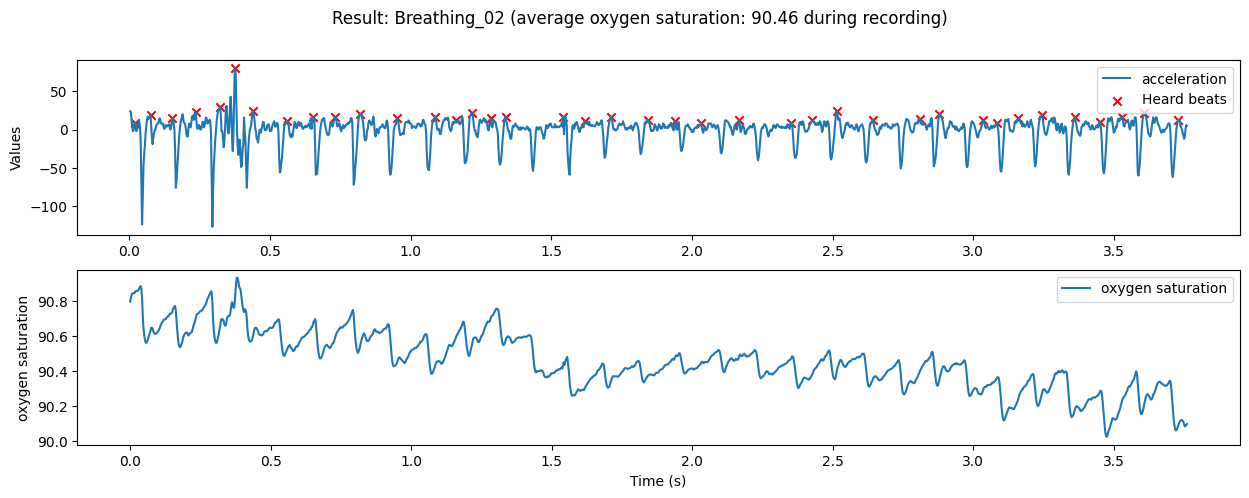

In [86]:
import pandas as pd
from scipy import signal
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import numpy as np

# Read file
data = pd.read_csv('v4_atmung_2_red.csv')
ir = pd.read_csv('v4_atmung_2_ir.csv')

# Red-LED und IR-LED-Werte aus der CSV-Datei extrahieren
d_values_red = data['D']
d_values_ir = ir['D']

# Sauerstoffsättigung nach Beer-Lambert-Gesetz
def calculate_spo2(red_value, ir_value):
    ratio = red_value / ir_value
    spo2 = -45.06 * ratio**2 + 30.354 * ratio + 94.845
    return spo2

spo2 = calculate_spo2(d_values_red, d_values_ir)

# Künstliche Zeitreihe erstellen
time_series = np.arange(len(d_values_ir)) * 0.0025  # 2,5 Millisekunden pro Eintrag, Sensor taste mit 400Hz

# Ableitung der Beschleunigung berechnen
acceleration = d_values_ir.diff()

# Peaks in der Beschleunigung finden
peaks, _ = find_peaks(acceleration, height=9, distance=20)

# Zeitdifferenzen zwischen aufeinanderfolgenden Peaks auf der künstlichen Zeitreihe berechnen
#time_diffs = np.diff(time_series[peaks])

# Durchschnittliche Sauerstoffsättigung pro Messung berechnen
saturation = spo2.mean()

# Create a figure and set its size to 15x5 in.
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,5))
fig.suptitle(f'Result: Breathing_02 (average oxygen saturation: {saturation:.2f} during recording)')

# Plot a line chart
ax1.plot(time_series, acceleration, label='acceleration')
ax1.scatter(time_series[peaks], acceleration.iloc[peaks], c='r', marker='x', label='Heard beats')
ax1.set_ylabel('Values')
ax1.legend()

ax2.plot(time_series, spo2, label='oxygen saturation')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('oxygen saturation')
ax2.legend()


# Show plot
plt.show()

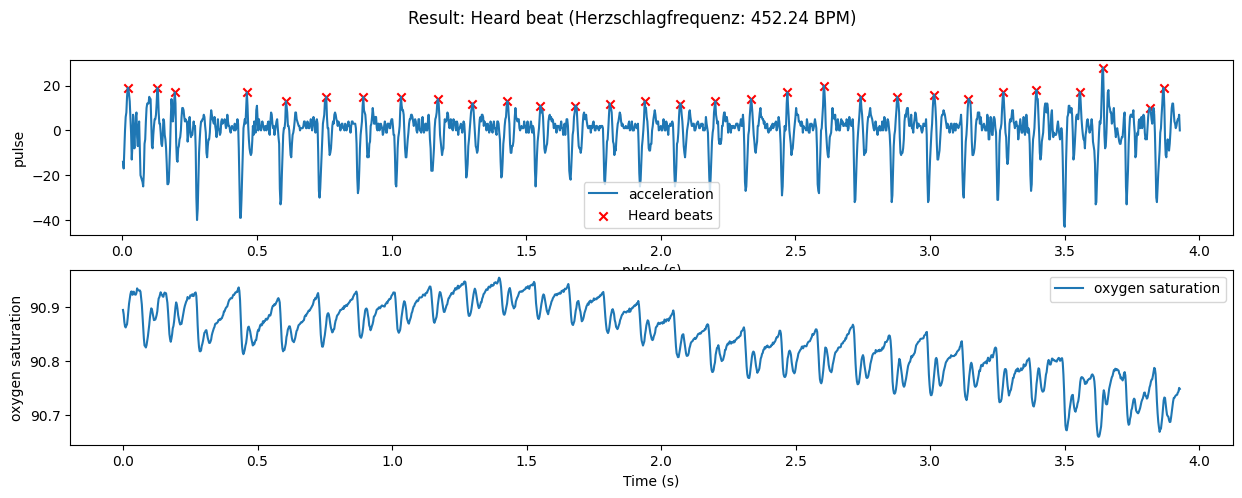

In [87]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Read file  , nrows=1000
data_ir = pd.read_csv('v4_puls_2_ir.csv')
data_red = pd.read_csv('v4_puls_2_red.csv')

# Werte aus der CSV-Datei extrahieren
d_values_ir = data_ir['D']
d_values_red = data_red['D']

# Sauerstoffsättigung nach Beer-Lambert-Gesetz
def calculate_spo2(red_value, ir_value):
    ratio = red_value / ir_value
    spo2 = -45.06 * ratio**2 + 30.354 * ratio + 94.845
    return spo2

spo2 = calculate_spo2(d_values_red, d_values_ir)

# Künstliche Zeitreihe erstellen
time_series = np.arange(len(data_ir)) * 0.0025  # 2,5 Millisekunden pro Eintrag, Sensor taste mit 400Hz

# Ableitung der Beschleunigung berechnen
acceleration = d_values_ir.diff()

# Peaks in der Beschleunigung finden
peaks, _ = find_peaks(acceleration, height=10, distance=20)

# Zeitdifferenzen zwischen aufeinanderfolgenden Peaks auf der künstlichen Zeitreihe berechnen
time_diffs = np.diff(time_series[peaks])

# Herzschlagfrequenz in BPM (Beats Per Minute) berechnen
heartbeats = 60 / np.mean(time_diffs)

# Plot erstellen
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,5))
fig.suptitle(f'Result: Heard beat (Herzschlagfrequenz: {heartbeats:.2f} BPM)')

ax1.plot(time_series, acceleration, label='acceleration')
ax1.scatter(time_series[peaks], acceleration.iloc[peaks], c='r', marker='x', label='Heard beats')
ax1.set_xlabel('pulse (s)')
ax1.set_ylabel('pulse')
ax1.legend()

ax2.plot(time_series, spo2, label='oxygen saturation')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('oxygen saturation')
ax2.legend()

# Diagramm anzeigen
plt.show()

